### Advanced Algorithm and Graph Mining Exam
#### Part II - Pandas
I'm Lorenzo Pisaneschi, I'm 25 years old, and I am from Pistoia, Tuscany, Italy.
I achieve my Bachelor degree in Computer Engineering at University of Studies
of Florence (UNIFI) with a thesis on "An application of NeuroGPS on light sheet
microscopic images".

In this Jupyter Notebook, COVID-19 data (from Regions and Provinces
in Italy) are analyzed to visualize some useful information about the
pandemic which has upset the world. This work has been realized on
Ubuntu 19.10 with the PyCharm IDE. This data inspection is powered by
Pandas and Matplotlib.

Data were collected from official
["Presidenza del Consiglio dei Ministri - Dipartimento Protezione Civile" repository](https://github.com/pcm-dpc/COVID-19 " pcm-dpc /
COVID-19 "). They are JSON files; here Region data and Province data are analyzed.
On the other hand, geographic data have been downloaded from
[Openopolis GeoJson repository](https://github.com/openpolis/geojson-italy "geojson-italy").

More info about this work are available at this
[GItHub Repo](https://github.com/pisalore/AAGM_exam "AAGM exam GitHUb repository").

##### First of all, data about COVID-19 pandemic in Italy are loaded. Data are provided in JSON format, ready to be analyzed, focusing on the provincial and regional ones.
Since there are a lot of data (Prime Minister's Office has declared the State of Emergency on Janaury 31, 2020),
only 60 representative rows for regional and provincial data tables are shown, with the aim to give an idea about the
dataset composition.

In [175]:
import datetime as dt
import json
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import pandas as pd
import geopandas as gpd
from IPython.display import display
pd.set_option('display.min_rows', 60)
pd.options.display.max_rows = 100
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None

with open('covid19/dpc-covid19-ita-province.json') as json_provinces_data:
        provinces_data = json.load(json_provinces_data)
with open('covid19/dpc-covid19-ita-regioni.json') as json_regions_data:
        regions_data = json.load(json_regions_data)

##### Region data
Here all the Italian Regions' COVID-19 data are displayed. Data are divided by date starting from February, 24th 2020
up to date. Here health, geographic and "administrative" data (like "codice_regione", the region code) are showed. It is
also provided a geographical information: longitude and latitude are to be intended for Regions' capitals.

In [176]:
dF_regions = pd.read_json(r'covid19/dpc-covid19-ita-regioni.json')
display(dF_regions)

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,NaN,NaN,0,5,NaN,None
1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,NaN,None
2,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,NaN,NaN,0,1,NaN,None
3,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,NaN,NaN,0,10,NaN,None
4,2020-02-24T18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,18,0,18,0,0,NaN,NaN,18,148,NaN,None
5,2020-02-24T18:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,0,0,0,0,0,0,0,0,0,NaN,NaN,0,58,NaN,None
6,2020-02-24T18:00:00,ITA,12,Lazio,41.892770,12.483667,1,1,2,0,2,0,2,1,0,NaN,NaN,3,124,NaN,None
7,2020-02-24T18:00:00,ITA,7,Liguria,44.411493,8.932699,0,0,0,0,0,0,0,0,0,NaN,NaN,0,1,NaN,None
8,2020-02-24T18:00:00,ITA,3,Lombardia,45.466794,9.190347,76,19,95,71,166,0,166,0,6,NaN,NaN,172,1463,NaN,None
9,2020-02-24T18:00:00,ITA,11,Marche,43.616760,13.518875,0,0,0,0,0,0,0,0,0,NaN,NaN,0,16,NaN,None


##### Provincial data
Here, like for Regions above, all the Italian Provinces' COVID-19 data are displayed. Data are divided by date starting
from February, 24th 2020 up to date. The only health available data are the ones relative to **total cases** per day for each
province.

In [177]:
dF_provinces = pd.read_json(r'covid19/dpc-covid19-ita-province.json')
dF_provinces = dF_provinces[dF_provinces['denominazione_provincia'] != 'In fase di definizione/aggiornamento' ]
dF_provinces = dF_provinces[dF_provinces['denominazione_provincia'] != 'Fuori Regione / Provincia Autonoma' ]
dF_provinces = dF_provinces[dF_provinces['denominazione_provincia'] != 'In fase di definizione' ]
display(dF_provinces)

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note
0,2020-02-24T18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0,None
1,2020-02-24T18:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0,None
2,2020-02-24T18:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0,None
3,2020-02-24T18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0,None
5,2020-02-24T18:00:00,ITA,17,Basilicata,76,Potenza,PZ,40.639471,15.805148,0,None
6,2020-02-24T18:00:00,ITA,17,Basilicata,77,Matera,MT,40.667512,16.597924,0,None
8,2020-02-24T18:00:00,ITA,18,Calabria,78,Cosenza,CS,39.293087,16.256097,0,None
9,2020-02-24T18:00:00,ITA,18,Calabria,79,Catanzaro,CZ,38.905976,16.594402,0,None
10,2020-02-24T18:00:00,ITA,18,Calabria,80,Reggio di Calabria,RC,38.109228,15.643453,0,None
11,2020-02-24T18:00:00,ITA,18,Calabria,101,Crotone,KR,39.080369,17.125389,0,None


### Overall Plots
In this section, general data visualization is provided: below, totals
(total COVID-19 cases, recovered, deaths and active cases in Italy)
are shown, with a more detailed inspection regarding total and new cases
variations. This section's goal is to make available a very first data view
about the COVID-19 Italian national trend.

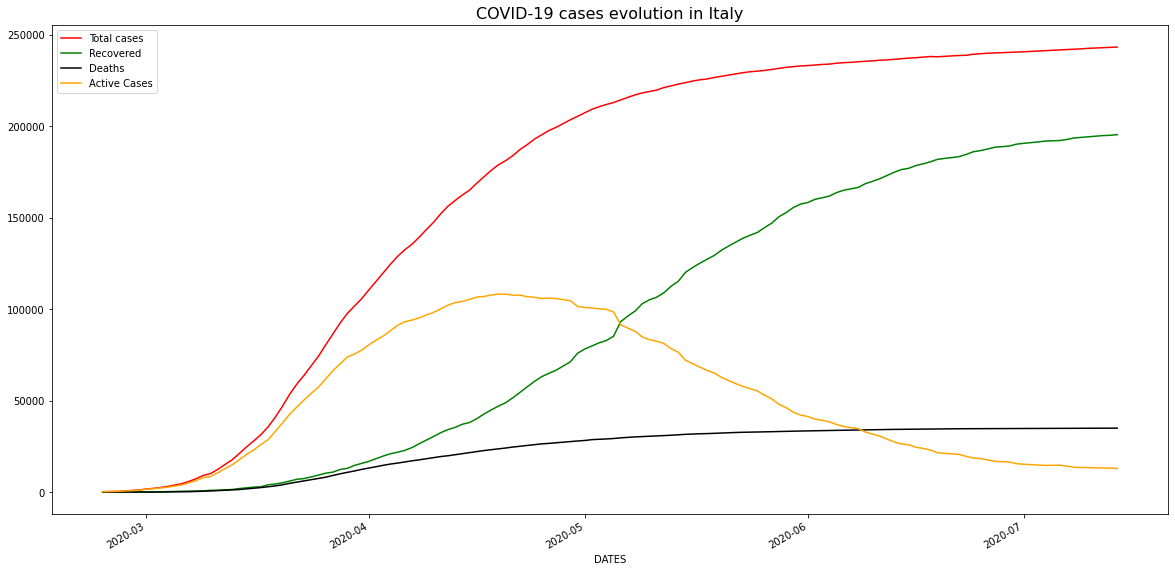

In [178]:
dates, complete_dates,total_cases, recovered, deaths, daily_deaths, active_cases, new_cases, percentage_variation, cases_variation = [], [], [], [], [], [], [], [], [], []

previous_deaths = 0
for date_group in dF_regions.groupby(['data']):
    t, r, d, nc, vc, dd = date_group[1]['totale_casi'].sum(),\
              date_group[1]['dimessi_guariti'].sum(), \
              date_group[1]['deceduti'].sum(),\
              date_group[1]['nuovi_positivi'].sum(),\
              date_group[1]['variazione_totale_positivi'].sum(),\
              date_group[1]['deceduti'].sum() - previous_deaths

    total_cases.append(t)
    recovered.append(r)
    deaths.append(d)
    daily_deaths.append(dd)
    previous_deaths = d
    active_cases.append(t  - r - d)
    new_cases.append(nc)
    percentage_variation.append(nc / t * 100)
    cases_variation.append(vc)
    complete_dates.append(date_group[0])
    dates.append(date_group[0].split('T')[0])

x_dates = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in dates]

fig, ax = plt.subplots(figsize = (20, 10))
plt.plot(x_dates, total_cases, label='Total cases', color="red")
plt.plot(x_dates, recovered, label='Recovered', color="green")
plt.plot(x_dates, deaths, label='Deaths', color="black")
plt.plot(x_dates, active_cases, label='Active Cases', color="orange")
ax.set(xlabel='DATES')
ax.set_title("COVID-19 cases evolution in Italy", fontdict={"fontsize": "16", "fontweight" : "3"})
plt.legend(loc="upper left")
plt.gcf().autofmt_xdate()
plt.show()

#### New Cases and Active Cases
Another interesting way to read data with respect to the "active cases" is to
visualize daily increment and percentage variation
in relation with total cases. In the next chart it is possible to visualize
active cases variation during the pandemic;
then, a percentage variation plot (new cases/total cases, in percent) is showed.


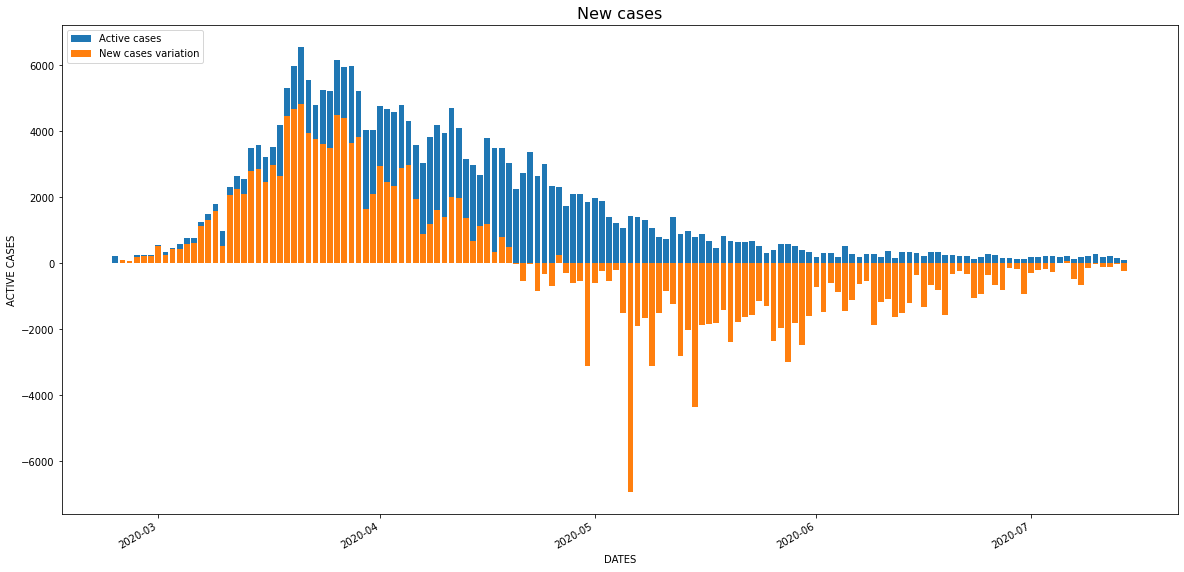

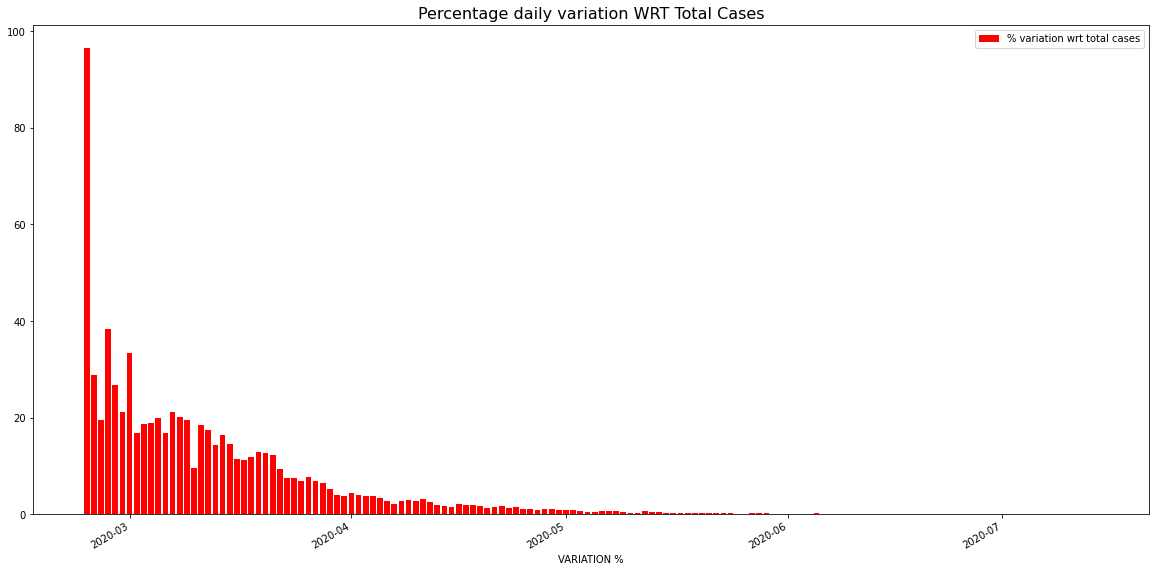

In [179]:
fig1, ax1 = plt.subplots(figsize = (20, 10))
ax1.set(xlabel='DATES', YLABEL='ACTIVE CASES')
ax1.set_title("New cases", fontdict={"fontsize": "16", "fontweight" : "3"})
ax1.bar(x_dates, new_cases, label='Active cases')
ax1.bar(x_dates, cases_variation, label='New cases variation')

plt.legend(loc="upper left")
plt.gcf().autofmt_xdate()

fig2, ax2 = plt.subplots(figsize = (20, 10))
ax2.set(xlabel='VARIATION %', ylabel='')
ax2.set_title("Percentage daily variation WRT Total Cases", fontdict={"fontsize": "16", "fontweight" : "3"})
ax2.bar(x_dates, percentage_variation, label='% variation wrt total cases', color='red')
plt.legend(loc="upper right")
plt.gcf().autofmt_xdate()
plt.show()

#### SSN data (Italian National Health Service)
However, despite the above numbers (important, but not everything) during a
pandemic a strong Health Service is fundamental; consequently, it is important
to know how to read Health Service data in order to be able to understand the
situation day by day and to move in the right way and limit damages.

In the following, a graph that summarizes the national
health data is presented, focusing on the active cases in the time, dividing
them by home isolation, hospitalization and intensive care (ICU).

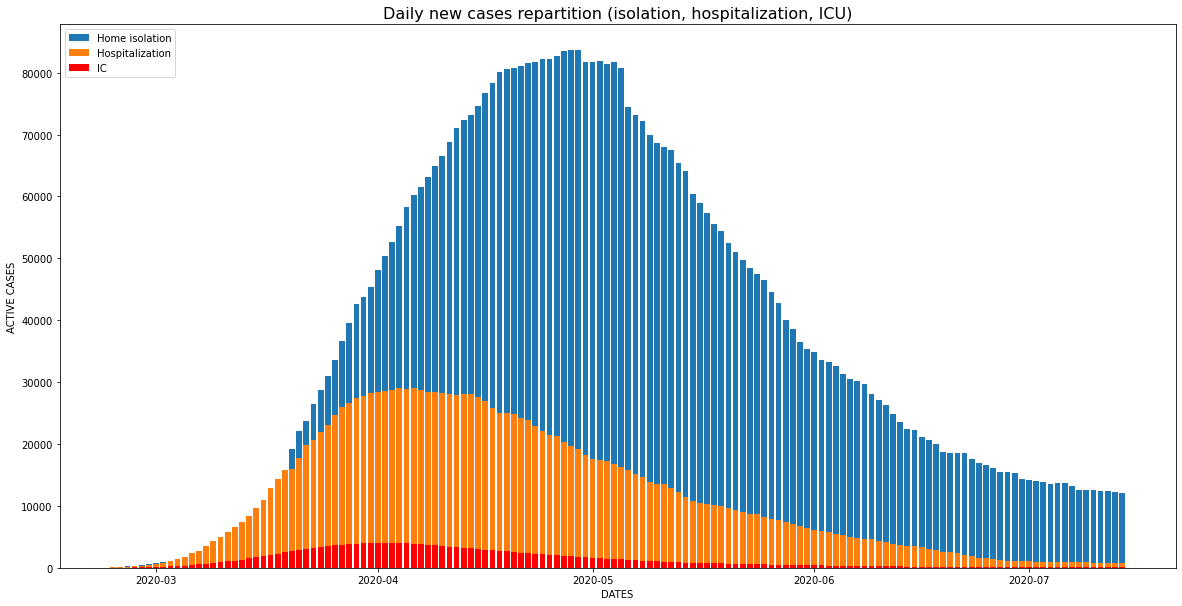

In [180]:
home_isolation, hospitalization, ic, swabs, new_cases_to_swabs = [], [], [], [], []
previous_swabs = 0
for date_group in dF_regions.groupby(['data']):
    home_isolation.append(date_group[1]['isolamento_domiciliare'].sum()),\
    hospitalization.append(date_group[1]['ricoverati_con_sintomi'].sum()), \
    ic.append(date_group[1]['terapia_intensiva'].sum())
    s_tot = date_group[1]['tamponi'].sum()
    s = s_tot - previous_swabs
    previous_swabs = s_tot
    swabs.append(s)
    new_cases_to_swabs.append(date_group[1]['nuovi_positivi'].sum() / s * 100)

fig3, ax3 = plt.subplots(figsize = (20, 10))
ax3.set(xlabel='DATES', ylabel='ACTIVE CASES')
ax3.set_title("Daily new cases repartition (isolation, hospitalization, ICU)", fontdict={"fontsize": "16", "fontweight" : "3"})
ax3.bar(x_dates, home_isolation, label='Home isolation')
ax3.bar(x_dates, hospitalization, label='Hospitalization')
ax3.bar(x_dates, ic, label='IC', color='red')
plt.legend(loc="upper left")
plt.show()

#### Tests and New Cases
It is also very important to know how many were positives among the people tested with the
pharyngeal laryngeal swab, which is considered the most accurate test for COVID-19 diagnosis. In the
follow, the tested positives percentage and the total performed tests
are shown. Since swabs number reported in data is related to their total
(every day the swabs number is obtained by the sum between the current and
previous date performed test) the following graph is generated isolating
the tests' for each day.

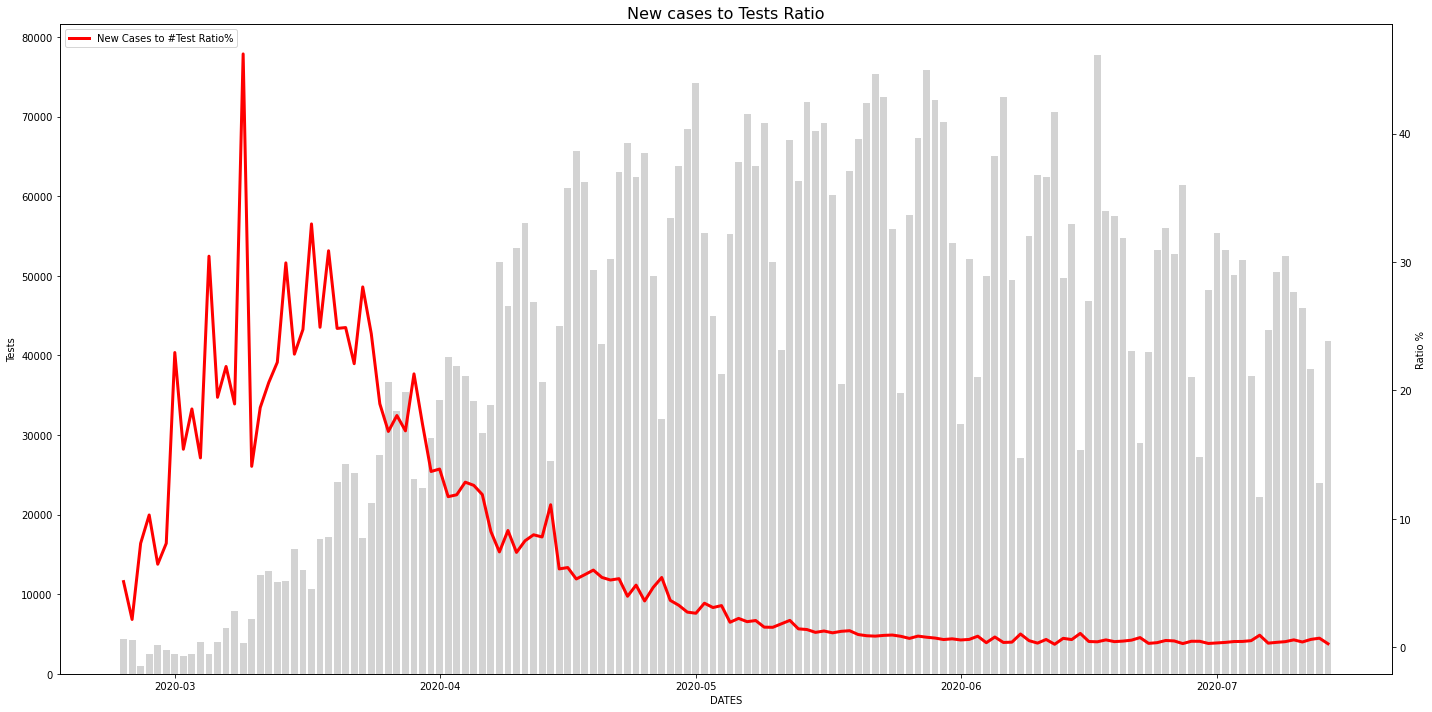

In [181]:
fig4, ax4 = plt.subplots(figsize = (20, 10))
ax4.set(xlabel='DATES', ylabel='Tests')
ax4.set_title("New cases to Tests Ratio", fontdict={"fontsize": "16", "fontweight" : "3"})
ax4.bar(x_dates, swabs, color='lightgrey')
ax5 = ax4.twinx()
ax5.set_ylabel('Ratio %')
ax5.plot(x_dates, new_cases_to_swabs, label='New Cases to #Test Ratio%', color="red", linewidth=3)
plt.legend(loc="upper left")
fig4.tight_layout()

plt.show()


#### Sum Up
With the above charts we could have an idea about how the pandemic evolved
during the last four month. It's clear that the quarantine had very important
effects on the phenomenon's evolution. The "artificial" pandemic peak (since
it has been reached following some strict rules) was reached in the period
between the end of April and the beginning of May. Surely, we have to
consider that every day tests' number is different, so the data relating
to "new cases" are not so reliable, like the one related to the "active cases".
On the other hand, the "new cases to tests number ratio" give us a more accurate
analysis respect to the pandemic evolution, since this data represent a sort of
normalization respect to the daily "new cases". Going on, as mentioned before,
the health data (moreover the ICU one) are very important: an health system
with under control hospitalizations guarantees assistance to new infected
people, even in the case of new COVID-19 waves.

###### Today situation
In the follow, to date situation for each Italian Region. In the "percentuale_guariti" column the recovered patients
percentage for each region is calculated.

In [182]:
dF_today_tot = dF_regions.loc[dF_regions.data == dF_regions.iloc[[-1]]['data'].item()]
dF_today = dF_today_tot[['data', 'denominazione_regione','totale_casi',
                'dimessi_guariti', 'deceduti', 'tamponi']]
dF_today['percentuale_guariti'] = dF_today['dimessi_guariti'] / dF_today['totale_casi'] * 100
dF_SNN = dF_today_tot[['terapia_intensiva', 'totale_ospedalizzati', 'isolamento_domiciliare']]
display(dF_today)

,data,denominazione_regione,totale_casi,dimessi_guariti,deceduti,tamponi,percentuale_guariti
2961,2020-07-14T17:00:00,Abruzzo,3328,2740,467,115444,82.331731
2962,2020-07-14T17:00:00,Basilicata,406,374,27,42851,92.118227
2963,2020-07-14T17:00:00,Calabria,1216,1062,97,106176,87.335526
2964,2020-07-14T17:00:00,Campania,4779,4095,432,304517,85.687382
2965,2020-07-14T17:00:00,Emilia-Romagna,28971,23511,4271,554781,81.153567
2966,2020-07-14T17:00:00,Friuli Venezia Giulia,3338,2907,345,214706,87.088077
2967,2020-07-14T17:00:00,Lazio,8356,6616,846,373026,79.176640
2968,2020-07-14T17:00:00,Liguria,10038,8283,1561,164739,82.516438
2969,2020-07-14T17:00:00,Lombardia,95173,70461,16760,1155050,74.034653
2970,2020-07-14T17:00:00,Marche,6805,5658,987,150309,83.144747


###### Region with minimum total cases (considering the total cases to tested people ratio), in percentage

In [183]:
dF_today['percentuale_casi%'] = dF_today['totale_casi'] / dF_today['tamponi'] * 100
display(dF_today.loc[dF_today['percentuale_casi%'].idxmin()])

data                     2020-07-14T17:00:00
denominazione_regione             Basilicata
totale_casi                              406
dimessi_guariti                          374
deceduti                                  27
tamponi                                42851
percentuale_guariti                  92.1182
percentuale_casi%                   0.947469
Name: 2962, dtype: object

###### Region with maximum total cases (considering the total cases to tested people ratio), in percentage

In [184]:
display(dF_today.loc[dF_today['percentuale_casi%'].idxmax()])

data                     2020-07-14T17:00:00
denominazione_regione              Lombardia
totale_casi                            95173
dimessi_guariti                        70461
deceduti                               16760
tamponi                              1155050
percentuale_guariti                  74.0347
percentuale_casi%                    8.23973
Name: 2969, dtype: object

###### Region with minimum recovered patients (considering the total recovered to total cases ratio), in percentage

In [185]:
display(dF_today.loc[dF_today['percentuale_guariti'].idxmin()])

data                     2020-07-14T17:00:00
denominazione_regione              Lombardia
totale_casi                            95173
dimessi_guariti                        70461
deceduti                               16760
tamponi                              1155050
percentuale_guariti                  74.0347
percentuale_casi%                    8.23973
Name: 2969, dtype: object

###### Region with maximum recovered patients (considering the total recovered to total cases ratio), in percentage

In [186]:
display(dF_today.loc[dF_today['percentuale_guariti'].idxmax()])

data                     2020-07-14T17:00:00
denominazione_regione                 Umbria
totale_casi                             1450
dimessi_guariti                         1362
deceduti                                  80
tamponi                               107301
percentuale_guariti                   93.931
percentuale_casi%                    1.35134
Name: 2979, dtype: object

###### Region with minimum deaths


In [187]:
display(dF_today.loc[dF_today['deceduti'].idxmin()])

data                     2020-07-14T17:00:00
denominazione_regione                 Molise
totale_casi                              446
dimessi_guariti                          414
deceduti                                  23
tamponi                                24875
percentuale_guariti                  92.8251
percentuale_casi%                    1.79296
Name: 2971, dtype: object

###### Region with maximum deaths


In [188]:
display(dF_today.loc[dF_today['deceduti'].idxmax()])

data                     2020-07-14T17:00:00
denominazione_regione              Lombardia
totale_casi                            95173
dimessi_guariti                        70461
deceduti                               16760
tamponi                              1155050
percentuale_guariti                  74.0347
percentuale_casi%                    8.23973
Name: 2969, dtype: object

#### The day with the higher total new cases value
March 21th 2020 has been the day with the higher total new cases value: below a table sums up the new cases values for each
region on that day.

In [189]:
higher_new_cases_day = dF_regions.loc[dF_regions['data']
                          == complete_dates[new_cases.index(max(new_cases))],
               ['data', 'denominazione_regione','nuovi_positivi']]
display(higher_new_cases_day)
print('Max total new cases in a day:', higher_new_cases_day['nuovi_positivi'].sum())


,data,denominazione_regione,nuovi_positivi
546,2020-03-21T17:00:00,Abruzzo,80
547,2020-03-21T17:00:00,Basilicata,14
548,2020-03-21T17:00:00,Calabria,28
549,2020-03-21T17:00:00,Campania,95
550,2020-03-21T17:00:00,Emilia-Romagna,737
551,2020-03-21T17:00:00,Friuli Venezia Giulia,134
552,2020-03-21T17:00:00,Lazio,182
553,2020-03-21T17:00:00,Liguria,215
554,2020-03-21T17:00:00,Lombardia,3251
555,2020-03-21T17:00:00,Marche,172


Max total new cases in a day: 6557


#### The day with higher recovered number
May 6th 2020 has been the day with the higher total new recovered patients value: below a table sums up the recovered
values for each Region on that day.

In [190]:
all_new_recovered = np.zeros(dF_regions.shape[0])
for region in dF_regions.groupby(['denominazione_regione']):
    new_recovered = 0
    last_recovered = 0
    for region_date in region[1].groupby(['data']):
        recovered = region_date[1]['dimessi_guariti'].tolist(),
        new_recovered = recovered[0][0] - last_recovered
        last_recovered = recovered[0][0]
        index = dF_regions.loc[(dF_regions['denominazione_regione'] == region[0]) & (dF_regions['data'] == region_date[0])].index.values[0].tolist()
        all_new_recovered[index] = new_recovered
all_new_recovered.astype(int)
dF_regions['nuovi_dimessi_guariti'] = all_new_recovered
daily_new_recovered = []
for date_group in dF_regions.groupby(['data']):
    dnr = date_group[1]['nuovi_dimessi_guariti'].sum()
    daily_new_recovered.append(dnr)

higher_new_recovered_day = dF_regions.loc[dF_regions['data']
                          == complete_dates[daily_new_recovered.index(max(daily_new_recovered))],
                            ['data', 'denominazione_regione','nuovi_dimessi_guariti']]

display(higher_new_recovered_day)
print('Higher number of recovered per day:', higher_new_recovered_day['nuovi_dimessi_guariti'].sum())

,data,denominazione_regione,nuovi_dimessi_guariti
1512,2020-05-06T17:00:00,Abruzzo,34.0
1513,2020-05-06T17:00:00,Basilicata,8.0
1514,2020-05-06T17:00:00,Calabria,8.0
1515,2020-05-06T17:00:00,Campania,197.0
1516,2020-05-06T17:00:00,Emilia-Romagna,362.0
1517,2020-05-06T17:00:00,Friuli Venezia Giulia,28.0
1518,2020-05-06T17:00:00,Lazio,14.0
1519,2020-05-06T17:00:00,Liguria,186.0
1520,2020-05-06T17:00:00,Lombardia,5881.0
1521,2020-05-06T17:00:00,Marche,5.0


Higher number of recovered per day: 8014.0


###### The day with higher deaths number


In [191]:
all_new_deaths = np.zeros(dF_regions.shape[0])
for region in dF_regions.groupby(['denominazione_regione']):
    new_deaths = 0
    last_deaths = 0
    for region_date in region[1].groupby(['data']):
        deaths = region_date[1]['deceduti'].tolist(),
        new_deaths = deaths[0][0] - last_deaths
        last_deaths = deaths[0][0]
        index = dF_regions.loc[(dF_regions['denominazione_regione'] == region[0]) & (dF_regions['data'] == region_date[0])].index.values[0].tolist()
        all_new_deaths[index] = new_deaths
all_new_deaths.astype(int)
dF_regions['nuovi_deceduti'] = all_new_deaths
daily_new_deaths = []
for date_group in dF_regions.groupby(['data']):
    dnd = date_group[1]['nuovi_deceduti'].sum()
    daily_new_deaths.append(dnd)

higher_new_deaths_day = dF_regions.loc[dF_regions['data']
                          == complete_dates[daily_new_deaths.index(max(daily_new_deaths))],
                            ['data', 'denominazione_regione','nuovi_deceduti']]

display(higher_new_deaths_day)
print('Higher number of deaths per day:', higher_new_deaths_day['nuovi_deceduti'].sum())


,data,denominazione_regione,nuovi_deceduti
672,2020-03-27T17:00:00,Abruzzo,5.0
673,2020-03-27T17:00:00,Basilicata,2.0
674,2020-03-27T17:00:00,Calabria,4.0
675,2020-03-27T17:00:00,Campania,15.0
676,2020-03-27T17:00:00,Emilia-Romagna,93.0
677,2020-03-27T17:00:00,Friuli Venezia Giulia,4.0
678,2020-03-27T17:00:00,Lazio,12.0
679,2020-03-27T17:00:00,Liguria,51.0
680,2020-03-27T17:00:00,Lombardia,541.0
681,2020-03-27T17:00:00,Marche,26.0


Higher number of deaths per day: 969.0


#### First 5 most affected Italian Regions plot
Lombardy has more than three times infected people than Piedmont, the second Italian Region for COVID-19 total cases.

In [ ]:
last_regions_data = dF_regions.loc[dF_regions['data'] == dF_provinces['data'].iloc[-1]]
lrds = last_regions_data.nlargest(5, ['totale_casi'])[['denominazione_regione', 'totale_casi']]
first_five_max_num_cases_regions = []

for i in range(5):
    first_five_max_num_cases_regions.append([lrds['denominazione_regione'].iloc[i]])
for date_group in dF_regions.groupby(['data']):
    for j in range(5):
        first_five_max_num_cases_regions[j]\
            .append(date_group[1].loc[date_group[1]['denominazione_regione']
                                      == first_five_max_num_cases_regions[j][0]]['totale_casi'].item())
colors = ['red', 'brown', 'green', 'blue', 'orange']
fig10, ax10 = plt.subplots(figsize = (20, 10))
for i in range(5):
    plt.plot(x_dates, first_five_max_num_cases_regions[i][1:], label=first_five_max_num_cases_regions[i][0], color=colors[i])

ax10.set(xlabel='DATES', ylabel='TOTALS', title='FIRST FIVE MOST AFFECTED ITALIAN REGIONS')
plt.legend(loc="upper left")
plt.gcf().autofmt_xdate()
plt.show()

### Provinces data analysis
Regional and provincial data are correlated. Italian Civil Protection Department provides everyday
up to date data about total COVID-19 cases which have been registered in each Province. In the follow, it is shown the
pandemic situation all around Italy, in terms of "total cases" registered per each province in each region since
February 24th 2020. It is also shown the "total Province cases" to "total Region cases" ratio, in order to understand
how the virus spread in Italy.

In [ ]:
dF_regions2 = dF_regions[['data', 'denominazione_regione', 'totale_casi']]
dF_provinces2 = dF_provinces[['data', 'denominazione_regione','denominazione_provincia', 'totale_casi']]
cases_by_regions_and_provinces = pd.merge(dF_regions2, dF_provinces2, on=['denominazione_regione', 'data'])
cases_by_regions_and_provinces.columns = ['data', 'denominazione_regione','totale_casi_regionali', 'denominazione_provincia', 'totale_casi_provincia']
cases_by_regions_and_provinces.set_index(['denominazione_regione', 'data'], inplace=True)
cases_by_regions_and_provinces['% casi'] = cases_by_regions_and_provinces['totale_casi_provincia'] \
                                             / cases_by_regions_and_provinces['totale_casi_regionali'] * 100
cases_by_regions_and_provinces


##### First 10 provinces with the higher number of COVID-19 cases
From these next two tables it is evident that COVID-19 pandemic hit the most in Northern Italy, while the Southern Italy
was less affected.

In [ ]:
last_provinces_data = dF_provinces.loc[dF_provinces['data'] == dF_provinces['data'].iloc[-1]]
del last_provinces_data['long']
del last_provinces_data['lat']

lpdl = last_provinces_data.nlargest(10, ['totale_casi'])[['denominazione_regione', 'denominazione_provincia', 'totale_casi']]
display(lpdl)

##### First 10 provinces with the lower number of COVID-19 cases

In [ ]:
lpds = last_provinces_data.nsmallest(10, ['totale_casi'])[['denominazione_regione', 'denominazione_provincia', 'totale_casi']]
display(lpds)


##### Max COVID-19 cases for province in each region
As we expected, the higher cases number in each Region has been registered in their corresponding capital in most of cases.
In the follow it is also provided a plot which shows the pandemic evolution in these most affected cities.

In [ ]:
higher_total_cases_by_province_for_region = pd.DataFrame(columns=['denominazione_regione', 'denominazione_provincia', 'totale_casi'])
for region in last_provinces_data.groupby(['denominazione_regione']):
    df = region[1][region[1].totale_casi == region[1].totale_casi.max()][['denominazione_regione', 'denominazione_provincia', 'totale_casi']]
    higher_total_cases_by_province_for_region = pd.concat([higher_total_cases_by_province_for_region, df], ignore_index=True, sort=False)

higher_total_cases_by_province_for_region

In [ ]:
higher_total_cases_by_province_for_region_evolution = []
for i in range(20):
    higher_total_cases_by_province_for_region_evolution.append([higher_total_cases_by_province_for_region['denominazione_provincia'].iloc[i]])
for date_group in dF_provinces.groupby(['data']):
    for j in range(20):
        higher_total_cases_by_province_for_region_evolution[j].append(date_group[1].loc[date_group[1]['denominazione_provincia']
                                      == higher_total_cases_by_province_for_region_evolution[j][0]]['totale_casi'].item())

fig6, ax6 = plt.subplots(figsize = (20, 10))
for i in range(20):
    plt.plot(x_dates, higher_total_cases_by_province_for_region_evolution[i][1:], label=higher_total_cases_by_province_for_region_evolution[i][0])

ax6.set(xlabel='DATES', ylabel='TOTALS')
ax6.set_title("'COVID-19 pandemic evolution in the most affected provinces of all Italian Regions", fontdict={"fontsize": "16", "fontweight" : "3"})
plt.legend(loc="upper left")
plt.gcf().autofmt_xdate()
plt.show()

##### First 5 most affected Italy provinces plot
In the follow, the COVID-19 pandemic evolution in the five most affected Italian provinces: Milano, Torino, Brescia, Bergamo, Cremona.
The more impressive thing is that 4 out of 5 Provinces in this ranking are from Lombardy.

In [ ]:
first_five_max_num_cases_provinces = []
for i in range(5):
    first_five_max_num_cases_provinces.append([lpdl['denominazione_provincia'].iloc[i]])
for date_group in dF_provinces.groupby(['data']):
    for j in range(5):
        first_five_max_num_cases_provinces[j]\
            .append(date_group[1].loc[date_group[1]['denominazione_provincia']
                                      == first_five_max_num_cases_provinces[j][0]]['totale_casi'].item())
colors = ['red', 'brown', 'green', 'blue', 'orange']
fig7, ax7 = plt.subplots(figsize = (20, 10))
for i in range(5):
    plt.plot(x_dates, first_five_max_num_cases_provinces[i][1:], label=first_five_max_num_cases_provinces[i][0], color=colors[i])

ax7.set(xlabel='DATES', ylabel='TOTALS')
ax7.set_title("First five most affected Italian Provinces", fontdict={"fontsize": "16", "fontweight" : "3"})
plt.legend(loc="upper left")
plt.gcf().autofmt_xdate()
plt.show()



##### First 5 less affected Italy provinces plot
Then, the first 5 Italian Provinces less affected by the pandemic. As we saw before in the other plots and tables, this
chart confirms that in the Southern Italy the SARS-COVID2 virus has spread less more in the North of the country.
Total cases magnitude is twice less than one presented in the above chart.

In [ ]:
first_five_min_num_cases_provinces = []
for i in range(5):
    first_five_min_num_cases_provinces.append([lpds['denominazione_provincia'].iloc[i]])
for date_group in dF_provinces.groupby(['data']):
    for j in range(5):
        first_five_min_num_cases_provinces[j]\
            .append(date_group[1].loc[date_group[1]['denominazione_provincia']
                                      == first_five_min_num_cases_provinces[j][0]]['totale_casi'].item())
colors = ['red', 'brown', 'green', 'blue', 'orange']
fig7, ax7 = plt.subplots(figsize = (20, 10))
for i in range(5):
    plt.plot(x_dates, first_five_min_num_cases_provinces[i][1:], label=first_five_min_num_cases_provinces[i][0], color=colors[i])

ax7.set(xlabel='DATES', ylabel='TOTALS', title='FIRST FIVE LESS AFFECTED ITALIAN PROVINCES')
plt.legend(loc="upper left")
plt.gcf().autofmt_xdate()
plt.show()


## Heatmaps

Finally, summing up the whole data which we saw in this notebook, two heatmaps are showed.
The first is related to total cases for Province. The second describes the deaths rate per region.
The warmer the colors, the higher number of COVID-19 cases in the first map, the higher death rate in the other one,
have been registered.



In [ ]:
it_prov_geo = "geojson/limits_IT_provinces.geojson"

map_prov_df = gpd.read_file(it_prov_geo)
province_map = map_prov_df.head(107)
dF_today_prov = dF_provinces[['denominazione_provincia', 'totale_casi']].tail(107)


merged_prov = pd.merge(province_map, dF_today_prov, left_on=  ['prov_name'],
                   right_on= ['denominazione_provincia'])

total_cases_col = 'totale_casi'
fig8, ax8 = plt.subplots(1, figsize=(10, 20))
ax8.axis("off")
ax8.set_title("Total COVID-19 cases in Italy", fontdict={"fontsize": "16", "fontweight" : "3"})
v_min, v_max = dF_today_prov[['totale_casi']].min()[0], dF_today_prov[['totale_casi']].max()[0]
sm = plt.cm.ScalarMappable(cmap="YlOrRd", norm=plt.Normalize(vmin=v_min, vmax=v_max))
sm._A = []
divider = make_axes_locatable(ax8)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = fig8.colorbar(sm, cax=cax)
merged_prov.plot(column=total_cases_col, cmap="YlOrRd", linewidth=0.8, ax=ax8, edgecolor="0.8")



In [ ]:
it_reg_geo = 'geojson/limits_IT_regions.geojson'

map_reg_df = gpd.read_file(it_reg_geo)
region_map = map_reg_df.head(30)

dF_regions['tasso_mortalità'] = dF_regions['deceduti'] / dF_regions['totale_casi'] * 100
dF_death_rate_reg = dF_regions[['denominazione_regione', 'tasso_mortalità', 'codice_regione']].tail(30)
dF_death_rate_reg.loc[dF_death_rate_reg['codice_regione'] == 22, 'codice_regione'] = 4
merged_reg = pd.merge(region_map, dF_death_rate_reg,  left_on=  ['reg_istat_code_num'],
                   right_on= ['codice_regione'])

death_rate_col = 'tasso_mortalità'
fig9, ax9 = plt.subplots(1, figsize=(10, 20))
ax9.axis("off")
ax9.set_title("Death rate due to COVID-19 per Region Area in Italy", fontdict={"fontsize": "16", "fontweight" : "3"})
v_min, v_max = dF_death_rate_reg[['tasso_mortalità']].min()[0], dF_death_rate_reg[['tasso_mortalità']].max()[0]
sm = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=v_min, vmax=v_max))
sm._A = []
divider2 = make_axes_locatable(ax9)
cax = divider2.append_axes("right", size="5%", pad=0.1)
cbar2 = fig9.colorbar(sm, cax=cax)
merged_reg.plot(column=death_rate_col, cmap="Reds", linewidth=0.8, ax=ax9, edgecolor="0.8")